# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [ ]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-11-12 05:10:06--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-11-12 05:10:06--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [ ]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [ ]:
data = pd.read_csv('Gender_bias_spanish.csv')

In [ ]:
data

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased
...,...,...
1909,"iba a ir a dash pero mis 3 cortadas, mi color ...",non-biased
1910,que pinche chiste tiene estar medio alto si to...,non-biased
1911,si fuera bien idiota. ya hubiera comprado un a...,non-biased
1912,nota mental: no le quieras ayudar a alguien qu...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [ ]:
# Resumen del conjunto de datos

# Mostrar resumen general del DataFrame
print("Resumen general del conjunto de datos:")
print(data.info())

print("\nPrimeras filas del dataset:")
print(data.head())

# Contar la cantidad de tweets por etiqueta
print("\nCantidad de tweets por etiqueta:")
conteo = data['Label'].value_counts()
print(conteo)

print("\nPorcentaje de tweets por etiqueta:")
print((conteo / len(data) * 100).round(2))


Resumen general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  1914 non-null   object
 1   Label     1914 non-null   object
dtypes: object(2)
memory usage: 30.0+ KB
None

Primeras filas del dataset:
                                            Contents       Label
0  @chumeltorres ya cabrón! sin tí se reciben las...      biased
1  ¿alguien es tan amable de ir a hacerme la comp...  non-biased
2  @jenniferduquee hahaha, si está rico, nadamas ...  non-biased
3  @evagelcot donde lo ves!!? es mi programa favo...  non-biased
4  como siempre mi tortilla triunfa mas que otros...  non-biased

Cantidad de tweets por etiqueta:
Label
non-biased    1596
biased         318
Name: count, dtype: int64

Porcentaje de tweets por etiqueta:
Label
non-biased    83.39
biased        16.61
Name: count, dtype: float64


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

**Respuesta:** Del total de 1914 tweets, el 83.4% son non-biased y el 16.6% son biased. Esta proporción es importante porque muestra un desequilibrio en las clases, lo que puede afectar el análisis o entrenamiento de modelos de clasificación, ya que un conjunto de datos desbalanceado puede sesgar los resultados hacia la categoría mayoritaria.

## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [32]:
## Cree una funcion limpiar texto
def limpiar_texto(texto):
  texto = texto.lower()
  texto = re.sub(r'[^a-záéíóúüñ\s]', '', texto)
  palabras = texto.split()
  palabras = [palabra for palabra in palabras if palabra not in stop_words]
  texto_limpio = ' '.join(palabras)
  return texto_limpio


In [33]:
# Aplicar la limpieza de texto
data['Contenido_limpio'] = data['Contents'].apply(limpiar_texto)
print(data[['Contents', 'Contenido_limpio']].head())


                                            Contents  \
0  @chumeltorres ya cabrón! sin tí se reciben las...   
1  ¿alguien es tan amable de ir a hacerme la comp...   
2  @jenniferduquee hahaha, si está rico, nadamas ...   
3  @evagelcot donde lo ves!!? es mi programa favo...   
4  como siempre mi tortilla triunfa mas que otros...   

                                    Contenido_limpio  
0  chumeltorres cabrón tí reciben noticias colcho...  
1  alguien tan amable ir hacerme compra mañana ba...  
2  jenniferduquee hahaha si rico nadamas falta pr...  
3  evagelcot ves programa favorito sólo encuentro...  
4  siempre tortilla triunfa mas platos playa http...  


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

Palabras más comunes en tweets 'biased':
[('si', 30), ('mujer', 23), ('mujeres', 19), ('ser', 17), ('así', 16), ('quiero', 14), ('q', 14), ('mejor', 13), ('mamá', 12), ('tan', 12)]

Palabras más comunes en tweets 'non-biased':
[('si', 167), ('gracias', 90), ('bien', 69), ('año', 65), ('quiero', 62), ('hoy', 62), ('día', 62), ('mejor', 62), ('tan', 59), ('días', 58)]


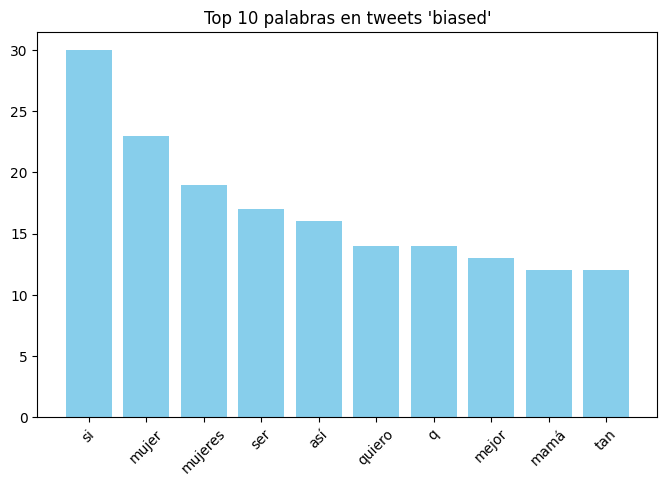

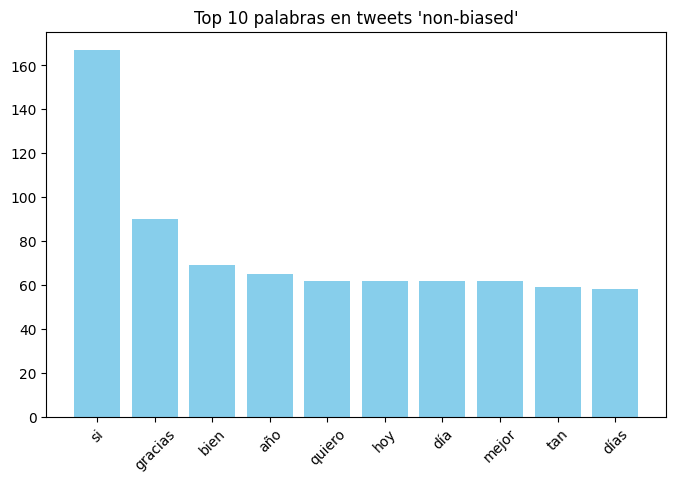

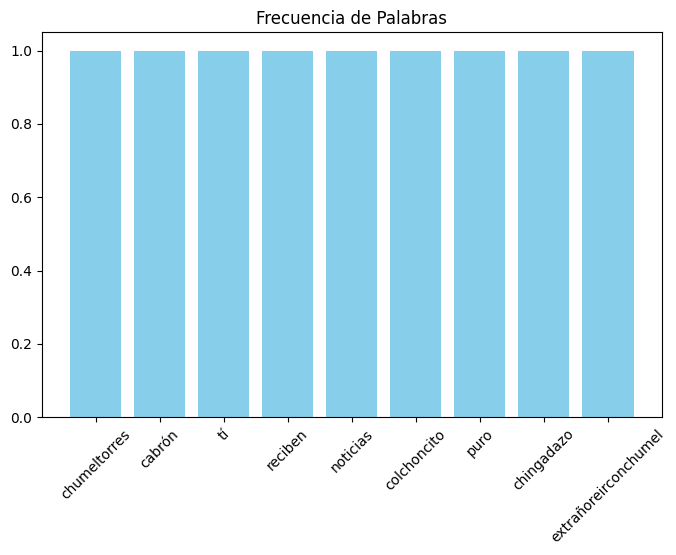

In [34]:

texto = data['Contenido_limpio'].iloc[0]
biased_tweets = data[data['Label'] == 'biased']['Contenido_limpio']
non_biased_tweets = data[data['Label'] == 'non-biased']['Contenido_limpio']

# Contar palabras
def contar_palabras(texto):
    texto_completo = ' '.join(texto)  # unir todos los tweets en un solo string
    palabras = texto_completo.split()
    return Counter(palabras)

contador_biased = contar_palabras(biased_tweets)
contador_non_biased = contar_palabras(non_biased_tweets)

# Mostrar las 10 palabras más comunes
print("Palabras más comunes en tweets 'biased':")
print(contador_biased.most_common(10))

print("\nPalabras más comunes en tweets 'non-biased':")
print(contador_non_biased.most_common(10))

# Visualización
def graficar_palabras(contador, titulo):
    palabras, cuentas = zip(*contador.most_common(10))
    plt.figure(figsize=(8,5))
    plt.bar(palabras, cuentas, color='skyblue')
    plt.title(titulo)
    plt.xticks(rotation=45)
    plt.show()

graficar_palabras(contador_biased, "Top 10 palabras en tweets 'biased'")
graficar_palabras(contador_non_biased, "Top 10 palabras en tweets 'non-biased'")



# Contar palabras
frecuencias = contar_palabras([texto])


# Visualización de frecuencia de palabras
plt.figure(figsize=(8,5))
plt.bar(frecuencias.keys(), frecuencias.values(), color='skyblue')
plt.title('Frecuencia de Palabras')
plt.xticks(rotation=45)
plt.show()



**Preguntas de Análisis de Frecuencia:**
## ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?

**Respuesta**
*La palabras mas comunes en biased en comparacion con non-biased son: mujer,mujeres,ser,asi,mama,tan*


## ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?

**Respuesta**
*Sí, en los tweets etiquetados como 'biased' se observan palabras que reflejan estereotipos o referencias específicas de género, como "mujer", "mujeres" o "mamá". Estas palabras sugieren un sesgo porque aparecen en contextos que pueden reforzar ideas preconcebidas o juicios sobre ciertos grupos, a diferencia de los tweets 'non-biased', donde el lenguaje es más neutral.*


## ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?


**Respuesta**
 *Las empresas podrían usar esta información para identificar qué palabras o temas suelen aparecer en opiniones sesgadas, lo que les permite entender mejor las percepciones negativas o estereotipadas de sus productos o servicios. Con esto, podrían ajustar su comunicación, diseñar campañas más inclusivas y tomar decisiones estratégicas para mejorar la experiencia del usuario y la percepción de la marca.*

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

In [35]:
## Cree una funcion para geenrar nube de palabras
def generar_nube_palabras(textos):
    texto_completo = ' '.join(textos)
    texto_limpio = limpiar_texto(texto_completo)
    nube = WordCloud(width=800, height=400, background_color='white').generate(texto_limpio)
    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.show()

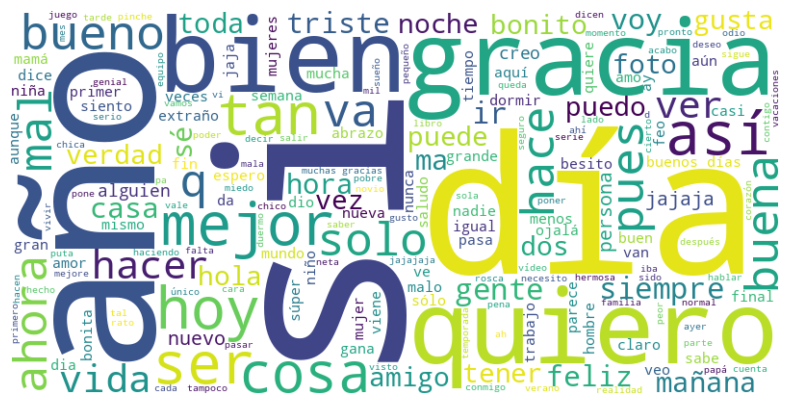

In [30]:
# Generar nube de palabras para cada conjunto
generar_nube_palabras(data['Contenido_limpio'])

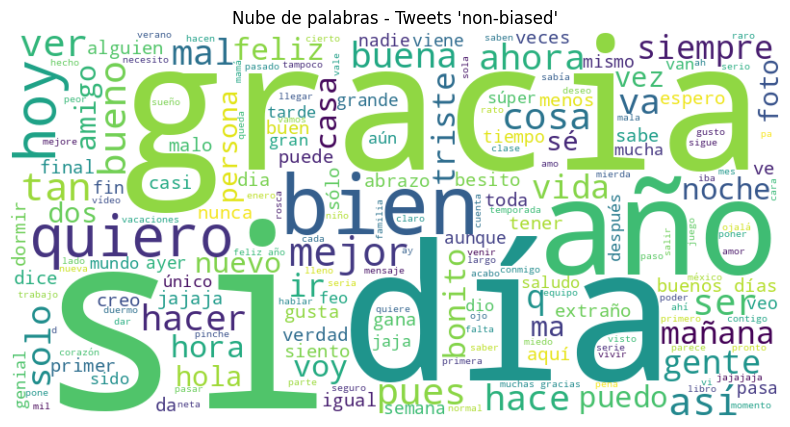

In [36]:
# NO biased nube de palabras

def generar_nube_palabras(textos):
    texto_completo = ' '.join(textos)              # unir todos los tweets
    texto_limpio = limpiar_texto(texto_completo)   # limpiar texto
    nube = WordCloud(width=800, height=400, background_color='white').generate(texto_limpio)

    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.title("Nube de palabras - Tweets 'non-biased'")
    plt.show()

# --- Filtrar solo los tweets con Label = 'non-biased' ---
non_biased_tweets = data[data['Label'] == 'non-biased']['Contents']

# --- Generar la nube ---
generar_nube_palabras(non_biased_tweets)


## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:


## ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
**Respuesta:**
*Puedo utilizar este análisis para entender qué tipo de lenguaje y palabras se asocian más con la percepción de la marca. Por ejemplo, identificando palabras comunes en los tweets ‘non-biased’, puedo ver qué mensajes son recibidos de manera neutral o positiva. Esto me permite ajustar la comunicación para reforzar los mensajes que generan confianza y claridad, evitando términos o expresiones que podrían generar sesgos o confusión en los usuarios.*


## ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?

**Respuesta:**
*Si noto que la mayoría de los tweets son ‘biased’, esto indica que la percepción del público está influenciada por ciertos prejuicios o ideas preconcebidas. En ese caso, puedo replantear los mensajes de la campaña para que sean más inclusivos, claros y transparentes. Además, podría diseñar contenidos que respondan directamente a esas percepciones erróneas o exageradas, buscando equilibrar la narrativa y generar una comunicación más objetiva y confiable.*


## ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

**Respuesta:**
*En futuros análisis podría explorar cómo cambian las palabras y sentimientos a lo largo del tiempo, por ejemplo, antes y después de campañas específicas o de eventos relevantes de la marca. También podría identificar correlaciones entre palabras clave y tipos de tweets (biased vs non-biased), analizar la frecuencia de aparición de ciertos términos y evaluar cómo influyen en la percepción general. Esto permitiría anticipar problemas de comunicación y diseñar estrategias más efectivas basadas en tendencias reales de la audiencia.*

